In [137]:
import json
import random
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load
from google.colab import drive

In [138]:
# Mount Google Drive to access dataset
drive.mount('/content/drive', force_remount=True)

# Set up directory path
file_path = '/content/drive/MyDrive/model_kmeans_v1.joblib'

Mounted at /content/drive


In [139]:
# membuat list kosong untuk menampung data
data_list = []

# membuat data
for i in range(1):
    data = {
        "EXT1": random.randint(1,5),"EXT2": random.randint(1,5),"EXT3": random.randint(1,5),"EXT4": random.randint(1,5),"EXT5": random.randint(1,5),"EXT6": random.randint(1,5),"EXT7": random.randint(1,5),"EXT8": random.randint(1,5),"EXT9": random.randint(1,5),"EXT10": random.randint(1,5),
        "EST1": random.randint(1,5),"EST2": random.randint(1,5),"EST3": random.randint(1,5),"EST4": random.randint(1,5),"EST5": random.randint(1,5),"EST6": random.randint(1,5),"EST7": random.randint(1,5),"EST8": random.randint(1,5),"EST9": random.randint(1,5),"EST10": random.randint(1,5),
        "AGR1": random.randint(1,5),"AGR2": random.randint(1,5),"AGR3": random.randint(1,5),"AGR4": random.randint(1,5),"AGR5": random.randint(1,5),"AGR6": random.randint(1,5),"AGR7": random.randint(1,5),"AGR8": random.randint(1,5),"AGR9": random.randint(1,5),"AGR10": random.randint(1,5),
        "CSN1": random.randint(1,5),"CSN2": random.randint(1,5),"CSN3": random.randint(1,5),"CSN4": random.randint(1,5),"CSN5": random.randint(1,5),"CSN6": random.randint(1,5),"CSN7": random.randint(1,5),"CSN8": random.randint(1,5),"CSN9": random.randint(1,5),"CSN10": random.randint(1,5),
        "OPN1": random.randint(1,5),"OPN2": random.randint(1,5),"OPN3": random.randint(1,5),"OPN4": random.randint(1,5),"OPN5": random.randint(1,5),"OPN6": random.randint(1,5),"OPN7": random.randint(1,5),"OPN8": random.randint(1,5),"OPN9": random.randint(1,5),"OPN10": random.randint(1,5)
    }
    # menambahkan data ke dalam list
    data_list.append(data)

# membuka file baru dengan mode write
with open('file.json', 'w') as f:
    # menuliskan data ke file JSON
    json.dump(data_list, f)


In [140]:
with open('file.json') as f:
    data = json.load(f)
    
# Mengubah dictionary menjadi DataFrame dan mengubah orientasi DataFrame menjadi format yang diinginkan
df = pd.DataFrame(data)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,1,2,5,5,4,5,3,1,1,...,2,1,2,2,5,3,1,2,1,2


In [141]:
# define the columns to modify
cols_to_modify = ['EXT2','EXT4','EXT6','EXT8','EXT10',
                  'EST2','EST4',
                  'AGR1','AGR3','AGR5','AGR7',
                  'CSN2','CSN4','CSN6','CSN8',
                  'OPN2','OPN4','OPN6','OPN9']

# apply the transformation to each value in the specified columns
df[cols_to_modify] = df[cols_to_modify].apply(lambda x: 6 - x)

# print the updated dataframe
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,5,2,1,5,2,5,3,1,5,...,2,5,2,4,5,3,1,2,5,2


In [142]:
# create new columns
df['EXT'] = df.filter(regex='EXT\d+').sum(axis=1)
df['EST'] = df.filter(regex='EST\d+').sum(axis=1)
df['AGR'] = df.filter(regex='AGR\d+').sum(axis=1)
df['CSN'] = df.filter(regex='CSN\d+').sum(axis=1)
df['OPN'] = df.filter(regex='OPN\d+').sum(axis=1)

# print the updated dataframe
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,EXT,EST,AGR,CSN,OPN
0,1,5,2,1,5,2,5,3,1,5,...,3,1,2,5,2,30,33,21,33,31


In [143]:
df = df.iloc[:, 50:]

df = df.apply(lambda x: (x - 10) / 40)
df.head()

,EXT,EST,AGR,CSN,OPN
0,0.5,0.575,0.275,0.575,0.525


In [144]:
ext = df.iloc[0]['EXT']
est = df.iloc[0]['EST']
agr = df.iloc[0]['AGR']
csn = df.iloc[0]['CSN']
opn = df.iloc[0]['OPN']

In [145]:
print(ext, est, agr, csn, opn)

0.5 0.575 0.275 0.575 0.525


In [146]:
model = joblib.load(file_path)

# Print the number of clusters
print('Number of clusters:', model.n_clusters)

Number of clusters: 5


In [147]:
# perform clustering and add cluster labels to dataframe
labels = model.predict(df)
print(labels + 1)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


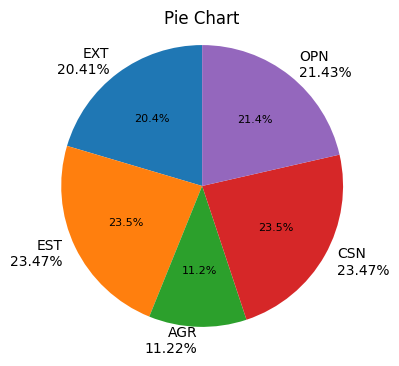

In [158]:
# Set the color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the pie chart
fig, ax = plt.subplots(figsize=(4, 4))
sums = df.iloc[0]
percentages = [round((x/sums.sum())*100, 2) for x in sums]
labels = [f'{col}\n{percentages[j]}%' for j, col in enumerate(sums.index)]
wedges, texts, autotexts = ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Pie Chart')
ax.axis('equal')

# Set the font size for the labels and percentages
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(8)

plt.show()

In [153]:
# Save the percentages for each column to variables
per_ext = percentages[0]
per_est = percentages[1]
per_agr = percentages[2]
per_csn = percentages[3]
per_opn = percentages[4]

In [154]:
print(per_ext, per_est, per_agr, per_csn, per_opn)

20.41 23.47 11.22 23.47 21.43
